# Conjuntos de Julia de polinomios cuadráticos

El propósito de este notebook es explorar propiedades básicas de los conjuntos de Julia de polinomios cuadráticos. 

Comenzamos con una definición. Dada $f: \mathbb{C} \rightarrow \mathbb{C}$ tal que $f(z) = z^{2} + c$, donde $c \in \mathbb{C}$, el conjunto de Julia lleno de $f$, escrito como $\mathcal{K}(f)$ se define como el conjunto de números complejos cuya órbita permanece acotada:

$$ \mathcal{K}(f) = \{ z \in \mathbb{C} : \{f^{\circ n}(z)\} \text{  es acotada } \} .$$

Si, por el contrario, la órbita de $z$ no es acotada, decimos que pertenece al conjunto $A_{f}(\infty)$, que reúne todos los puntos que son atraídos hacia el infinito al iterar:

$$ A_{f}(\infty) = \{ z \in \mathbb{C} : \{f^{\circ n}(z)\} \rightarrow \infty \} .$$

Este conjunto es abierto, conexo y no acotado. El conjunto de Julia de $f$, escrito como $\mathcal{J}(f)$ es la frontera común de estos dos conjuntos:

$$ \mathcal{J}(f) = \partial A_{f} (\infty) = \partial \mathcal{K}(f) $$

Si $\text{int} ( \mathcal{K} (f) ) = \varnothing$, entonces $\mathcal{K}(f) = \mathcal{J}(f)$.
En cierto sentido, el conjunto de Julia reúne puntos cuyos entornos, sin importar lo pequeños que sean, exhiben comportamiento caótico al iterar.

Los conjuntos $A_{f}(\infty)$ y $\mathcal{K}(f)$, son complementarios en $\mathbb{C}$. Dado que $A_{f}(\infty)$ no es acotado, podemos deducir que $\mathcal{K}(f)$ es un conjunto acotado. ¿Podemos estimar la región en la que se encuentra $\mathcal{K}(f)$? La respuesta es afirmativa y la provee el Teorema 1, pero antes debemos demostrar dos resultados:

***
**Lema 1.** Para cualesquiera $a, b \in \mathbb{C}$, tenemos que $|a + b| \geq|a| - |b|$.

**Demostración**. $|a| = |a + b - b| \leq |a + b| + |-b| = |a + b| + |b|$. De lo que podemos deducir que $|a+b| \geq |a| - |b|$. 

<div style="text-align: right"> $\square$ </div>

***

***

**Lema 2.** Considérese $f(z) = z^{2} + c$, donde $c$ es cualquier número complejo. Existe un $R \in \mathbb{R}$ tal que si $|z| > R$, entonces $|f(z)| > |z|$.

**Demostración.** Tenemos que $|f(z)| = |z^{2} + c| \geq |z|^{2} - |c|$, en virtud del Lema 1. Si queremos que $|f(z)| > |z|$, podríamos intentar demostrar que $|z|^{2} - |c| > |z|$, es decir, $|z|^{2}  - |z| - |c| > 0$. La expresión del lado izquierdo es un polinomio de grado 2 con raíces en $\mathbb{R}$, la mayor de las cuales está dada por 

$$ R = \frac{1 + \sqrt{1 + 4|c|}}{2}. $$ 

Así, si $|z| > R$, podemos estar seguros que $|z|^{2}  - |z| - |c| > 0$, es decir, $|z|^{2} - |c| > |z|$. De esto se sigue que $|f(z)| > |z|$.

<div style="text-align: right"> $\square$ </div>

***

***
**Teorema 1**. Sea $z$ un número complejo arbitrario. Si existe un $n \in \mathbb{N}$ tal que $|f^{\circ n}(z)| > R$, entonces $ \{f^{\circ n}(z)\} \rightarrow \infty $ de forma que $z \in A_{f}(\infty) $ y $z \notin \mathcal{J}(f)$.


**Demostración**. Supongamos que existe un $n \in \mathbb{N}$ tal que $|f^{\circ n}(z)| > R$. Notemos que cualquier iteración después de $n$ también será mayor que $R$: si $m \geq n$ y $|f^{\circ m}(z)| > R$, entonces $|f^{\circ (m + 1)}(z)|  = |f(f^{\circ m}(z))| > |f^{\circ m}(z)| > R$, en virtud del Lema 2. Así, notamos que la órbita de $z$ bajo $f$ es estrictamente creciente, de manera que $\{ f^{\circ n}(z) \} \rightarrow \infty $ y $z \in A_{f}(\infty)$.
<div style="text-align: right"> $\square$ </div>

***

***

**Corolario.** $\mathcal{K}(f)$ es un conjunto acotado. 

**Demostración**. $\mathcal{K}(f) \subseteq \text{B}(0, R)$, donde $R$ se define como en el Lema 2. 
<div style="text-align: right"> $\square$ </div>

***

La propiedad del Lema 2 puede ser verificada fácilmente: si deseamos comprobar que $z \in \mathcal{K}(f)$ podemos definir un número máximo de iteraciones $\texttt{maxiter}$ para calcular términos en la órbita $\{ f^{\circ n}(z) \}$. Si en algún momento $f^{\circ n}(z)$ escapa de disco de radio $R$, sabemos que no pertenece al conjunto de Julia lleno. Si, por el contrario, se alcanzó el máximo número de iteraciones y la órbita de $z$ no escapó del disco de radio $R$, entonces $z$ **probablemente** pertenece a $\mathcal{K}(f)$.

### Dependencias

In [1]:
from matplotlib.pyplot import figure, axis, imshow
import numpy as np
from math import sqrt
from numba import jit
from timeit import default_timer

Definimos una función $\texttt{iterationsJ}$ que devuelve número de iteraciones antes que la órbita de un número $\texttt{z}$ escape del disco de radio $\texttt{r}$. Para verificar si $| f^{\circ n}(z) | > R$, resulta ineficiente calcular la raíz cuadrada, por lo que probamos la condición equivalente $\text{Re}(z)^{2} + \text{Im}(z)^{2} > R^{2}$.

In [2]:
"""
Dado un número complejo z, el parámetro c, el número máximo de iteraciones maxiter
y el radio en el que se encuentra K(f), esta función devuelve el número de iteraciones
menor o igual que maxiter en la órbita de z que se encuentran dentro del disco de radio r.
"""
@jit
def iterationsJ(z, c, maxiter, r):
    for n in range(maxiter):
        if z.real*z.real + z.imag*z.imag > r*r:
            break;
        else:
            z = z*z + c
    return n        

La función $\texttt{drawJuliaSet}$ calcula, para cada pixel de la matriz $\texttt{image}$ el número complejo correspondiente e invoca $\texttt{iterationsJ}$ sobre cada uno de estos números. El valor que devuelve $\texttt{iterationsJ}$ se utiliza para asignar un color a cada pixel. Finalmente, la matriz $\texttt{image}$ se grafica.

In [3]:
@jit                
def drawJuliaSet(c, maxiter):  
    r = (1 + sqrt(1 + 4*abs(c)))/2 # Radio del Lema 2
    
    xvalues = np.linspace(-r, r, 1024).astype(np.float32) 
    yvalues = np.linspace(-r, r, 1024).astype(np.float32)

    height = width = len(xvalues)
    
    image = np.zeros((height, width), dtype = np.uint8) # Matriz de 0s y dimensión height x width
    
    for y in range(width):
        for x in range(height):
        
            re = xvalues[x]
            im = yvalues[y]
        
            image[x, y] = iterationsJ(complex(re, im), c, maxiter, r)
    
    figure(figsize=(10,10))
    axis('off')
    imshow(image.T, cmap = "terrain", interpolation = "bicubic",  origin="lower")

### $\mathcal{K}(z^{2} + 0.295 + 0.55i)$

Creado en 3.275250 s


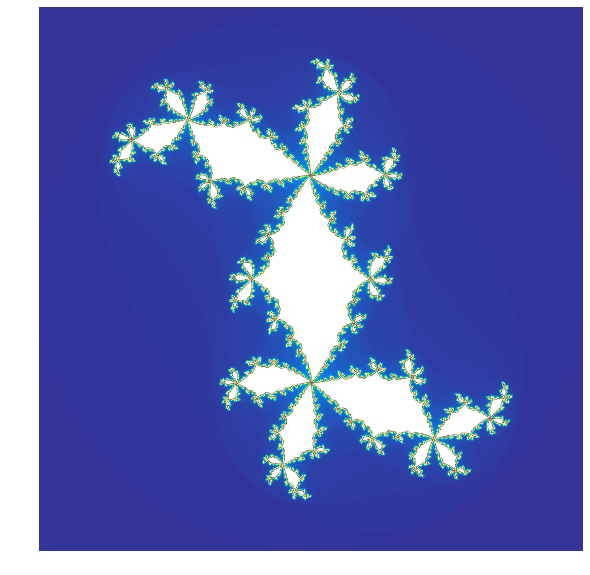

In [4]:
start = default_timer()
drawJuliaSet(0.295 + 0.55j, 1000)
dt = default_timer() - start
print("Creado en %f s" % dt)

### $\mathcal{K}(z^{2} - 0.8i)$

Creado en 0.103583 s


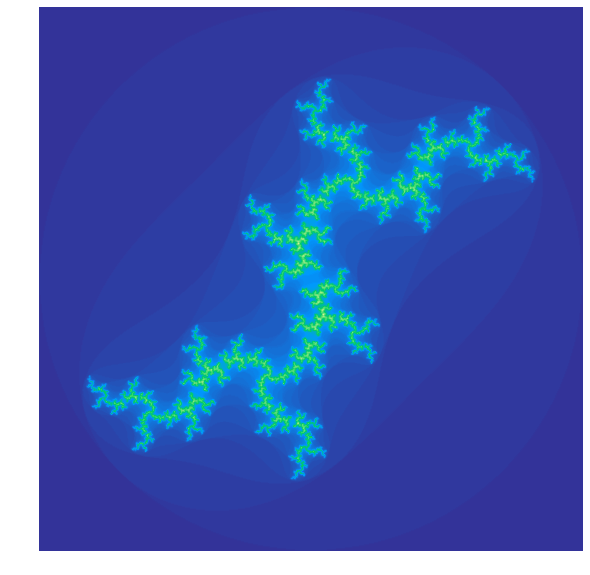

In [5]:
start = default_timer()
drawJuliaSet(-0.8j, 1000)
dt = default_timer() - start
print("Creado en %f s" % dt)

### $\mathcal{K}(z^{2} - 0.8 + 0.156i)$

Creado en 0.283960 s


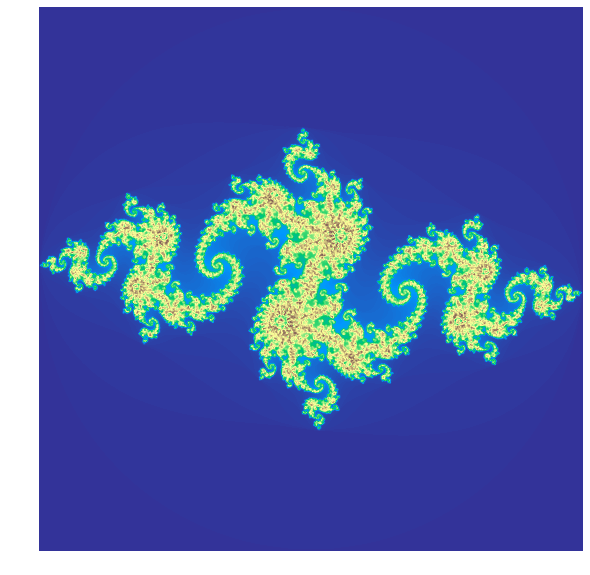

In [6]:
start = default_timer()
drawJuliaSet(-0.8 + 0.156j, 1000)
dt = default_timer() - start
print("Creado en %f s" % dt)

### $\mathcal{K}(z^{2} - 0.4 + 0.6i)$

Creado en 0.194510 s


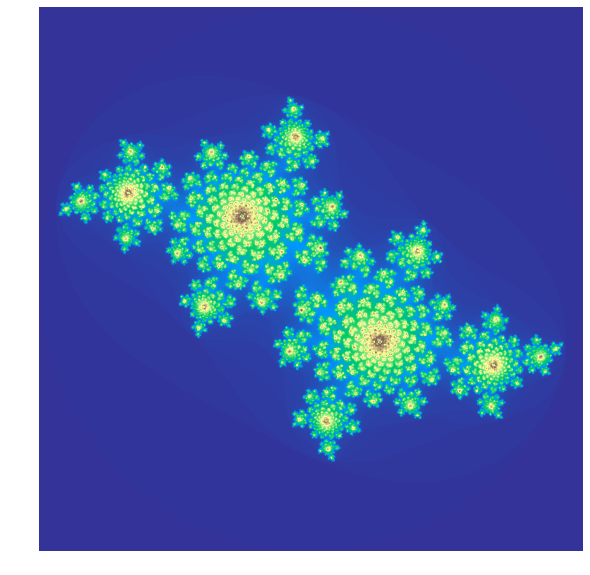

In [7]:
start = default_timer()
drawJuliaSet(-0.4 + 0.6j, 1000)
dt = default_timer() - start
print("Creado en %f s" % dt)

### $\mathcal{K}(z^{2} + 1 - \frac{1 + \sqrt{5}}{2})$

Creado en 2.355706 s


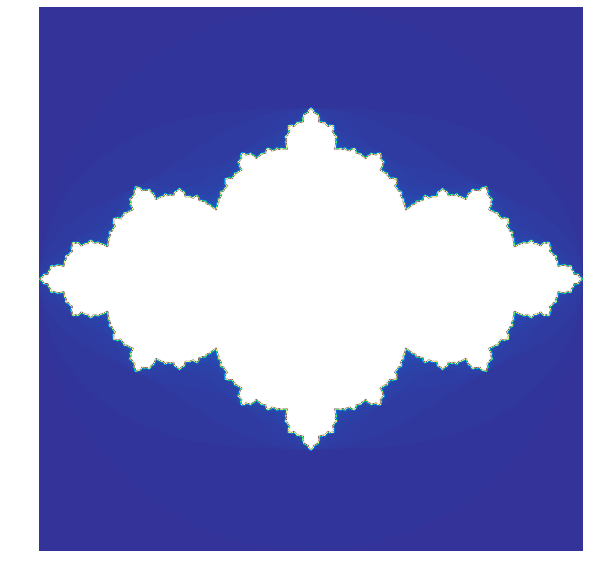

In [8]:
start = default_timer()
drawJuliaSet(1 - (1 + sqrt(5))/2, 1000)
dt = default_timer() - start
print("Creado en %f s" % dt)

# El conjunto de Mandelbrot

El conjunto de Julia de $f(z) = z^{2} + c$ puede o no ser conexo. Si es conexo, decimos que $c$ pertenece al conjunto de Mandelbrot $\mathcal{M}$:

$$ \mathcal{M} = \{ c \in \mathbb{C} : \mathcal{J}(z^{2} + c) \text{  es conexo  } \} $$

Esta condición parece difícil de verificar computacionalmente. Afortunadamente, tenemos los siguientes dos teoremas, que enunciamos sin demostración:

***

**Teorema 2.** Consideremos $f(z) = z^{2} + c$. $c \in \mathcal{M}$ si y solo si la órbita $\{ f^{\circ n}(0) \}$ es acotada. 

***

***
**Teorema 3.** $c \in \mathcal{M}$ si y solo si $| f^{\circ n}(0) | \leq 2$ para toda iteración $n \geq 1$.

***

Del teorema 3 podemos deducir que $\mathcal{M} \subseteq \overline{\text{B}(0, 2)}$. Esto sugiere un algoritmo para verificar si un número $c$ pertenece al conjunto de Mandelbrot: calculamos la órbita de $0$ bajo $f(z) = z^2 + c$ un número de veces $\texttt{maxiter}$. Si, en alguna iteración la órbita de $0$ escapa de de $\overline{\text{B}(0, 2)}$, entonces el parámetro $c$ queda descartado. De lo contrario, **probablemente** pertenece a $\mathcal{M}$. Utilizaremos esta idea para graficar $\mathcal{M}$.

In [9]:
"""
Dado el parámetro c y el número máximo de iteraciones maxiter
esta función devuelve el número de iteraciones menor o igual que
maxiter en la órbita de 0 que se encuentran dentro del disco de radio menor o igual a 2.
"""
@jit
def iterationsM(c, maxiter):
    z = complex(0, 0)
    
    for n in range(maxiter):
        z = z*z + c
        
        if z.real*z.real + z.imag*z.imag > 4:
            break
    
    return n

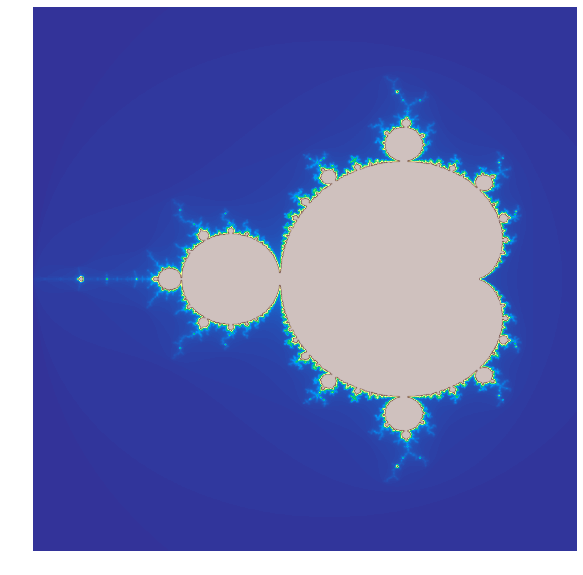

In [10]:
"""
Una cota más estrecha para el conjunto de Mandelbrot es 
la región [-2,0.75]x[-1.5, 1.5]
"""
xvalues = np.linspace(-2, 0.75, 768).astype(np.float32) 
yvalues = np.linspace(-1.5, 1.5, 768).astype(np.float32)

height = width = len(xvalues)
    
image = np.zeros((height, width), dtype = np.uint8) # Matriz de 0s y dimensión height x width
    
for y in range(width):
    for x in range(height):
        
        re = xvalues[x]
        im = yvalues[y]
        
        image[x, y] = iterationsM(complex(re, im), 1000)
    
figure(figsize=(10,10))
axis('off')
imshow(image.T, cmap = "terrain", interpolation = "bicubic",  origin="lower")